<a href="https://colab.research.google.com/github/Jakub-Pawinski-PP/WdSI_projekt/blob/main/road_signs_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#podlaczenie dysku Google
import os
from google.colab import drive

drive.mount('/content/drive')

#wskazanie scieżki do projektu
os.chdir('/content/drive/My Drive/WdSI_projekt')

Mounted at /content/drive


In [2]:
#instalacja biblioteki Detecto
!pip install detecto

In [3]:
#import funkcji z biblioteki Detecto
from detecto import core, utils, visualize

In [ ]:
#podanie sciezki treningowej oraz slow kluczowych
dataset_train = core.Dataset('train/annotations/', 'train/images/')
model = core.Model(['speedlimit', 'crosswalk', 'stop', 'trafficlight'])

#trenowanie zbioru
model.fit(dataset_train, epochs=10)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.62it/s]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.62it/s]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.61it/s]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.62it/s]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 659/659 [03:02<00:00,  3.62it/s]


In [ ]:
#zachowanie modelu sieci
model.save('model_weights.pth')

In [4]:
#wczytanie modelu sieci
model = core.Model.load('model_weights.pth', ['speedlimit', 'crosswalk', 'stop', 'trafficlight'])

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


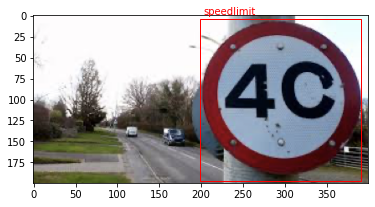

['speedlimit']
tensor([[198.1015,   3.7300, 391.1602, 196.8159]])
tensor([0.9977])


In [5]:
#wywolanie obrazu ze zbioru treningowego celem sprawdzenia mozliwosci oznaczenia znakow
image_train = utils.read_image('train/images/road101.png')
predictions_train = model.predict(image_train)

labels_train, boxes_train, scores_train = predictions_train

import numpy as np

#filtracja wynikow
train_filter = np.where(scores_train > 0.9)
scores_train_filter = scores_train[train_filter]
boxes_train_filter = boxes_train[train_filter]
num_list_train = list(train_filter[0])
labels_train_filter = []

for i in num_list_train:
  labels_train_filter.append(labels_train[i])
  
#wyplotowanie obrazu, rozpoznanie typu, podanie wspolrzędnych oraz prawdopodobienstwa
visualize.show_labeled_image(image_train, boxes_train_filter, labels_train_filter)
print(labels_train_filter)
print(boxes_train_filter)
print(scores_train_filter)

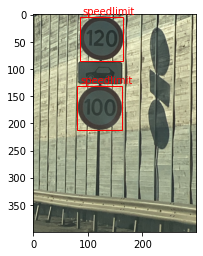

['speedlimit', 'speedlimit']
tensor([[ 84.9968,   4.6466, 164.2435,  85.1944],
        [ 80.5911, 130.8925, 163.2416, 212.1822]])
tensor([0.9984, 0.9983])


In [6]:
#wywolanie obrazu ze zbioru testowego celem sprawdzenia mozliwosci oznaczenia znakow
image_test = utils.read_image('test/images/road715.png')
predictions_test = model.predict(image_test)

labels_test, boxes_test, scores_test = predictions_test

#filtracja wynikow
test_filter = np.where(scores_test > 0.9)
scores_test_filter = scores_test[test_filter]
boxes_test_filter = boxes_test[test_filter]
num_list_test = list(test_filter[0])
labels_test_filter = []

for j in num_list_test:
  labels_test_filter.append(labels_test[j])
  
#wyplotowanie obrazu, rozpoznanie typu, podanie wspolrzednych oraz prawdopodobienstwa
visualize.show_labeled_image(image_test, boxes_test_filter, labels_test_filter)
print(labels_test_filter)
print(boxes_test_filter)
print(scores_test_filter)

In [26]:
#import PIL do uzyskania wymiarow zdjecia
from PIL import Image

#detekcja znakow ograniczenia predkosci
def detect():
    #petla wczytujaca obrazy ze zbioru testowego
    for detection in os.listdir('test/images'):
        image_detect = utils.read_image('test/images/'+detection)
        predictions_detect = model.predict(image_detect)

        labels_detect, boxes_detect, scores_detect = predictions_detect

        #filtracja wynikow
        detect_filter = np.where(scores_detect > 0.9)
        scores_detect_filter = scores_detect[detect_filter]
        boxes_detect_filter = boxes_detect[detect_filter]
        num_list_detect = list(detect_filter[0])
        labels_detect_filter = []

        for k in num_list_detect:
            labels_detect_filter.append(labels_detect[k])

        #podanie ilosci wykrytych znakow ograniczenia predkosci oraz ich wspolrzednych
        number_of_detected = labels_detect_filter.count('speedlimit')
        boxes_array = np.around(boxes_detect_filter.numpy())
        boxes_array = boxes_array.astype(int)

        #sprawdzenie wymiarow zdjecia
        is_big_enough = False

        for l in labels_detect_filter:
          img = Image.open('test/images/'+detection)
          width = img.width
          height = img.height
          for m in range(number_of_detected):
            detection_width = abs(boxes_array[m][2] - boxes_array[m][0])
            detection_height = abs(boxes_array[m][3] - boxes_array[m][1])
          is_big_enough = ((detection_width >= 1/10*width) and (detection_height >= 1/10*height))

        #detekcja znakow ograniczenia predkosci
        if 'speedlimit' in labels_detect_filter:
          if is_big_enough:
            print(detection)
            print(number_of_detected)
            for n in range(number_of_detected):
              print(boxes_array[n][0], boxes_array[n][2], boxes_array[n][1], boxes_array[n][3])

In [27]:

x = input()
if x == "detect":
    detect()

detect
road661.png
1
116 192 218 296
road686.png
1
58 166 270 376
road683.png
1
86 140 204 259
road679.png
1
136 176 178 222
road685.png
1
86 169 192 273
road663.png
1
103 161 214 272
road660.png
1
131 193 189 251
road682.png
1
100 148 214 259
road690.png
2
100 139 217 257
99 141 152 193
road664.png
2
85 158 201 274
86 158 116 188
road670.png
1
129 190 145 206
road680.png
1
156 203 123 175
road665.png
2
56 145 302 395
54 146 194 286
road666.png
2
110 222 219 336
107 220 86 201
road669.png
1
113 155 170 211
road684.png
1
93 159 232 298
road662.png
1
78 125 152 199
road714.png
2
67 127 176 237
64 125 272 333
road752.png
2
60 101 132 174
114 156 131 173
road713.png
2
99 149 212 262
101 150 134 184
road734.png
2
132 229 142 241
143 242 291 390
road739.png
2
104 149 222 268
106 152 148 195
road745.png
2
44 91 200 244
50 93 133 177
road732.png
2
103 164 189 250
99 160 96 157
road753.png
2
133 188 135 190
62 117 137 192
road691.png
2
125 173 194 242
125 175 118 166
road754.png
2
84 161 101 17